<a href="https://colab.research.google.com/github/JALVARADORUIZ/Magister_BigData_UB/blob/main/AlvaradoRuizJoseArmando_M8B1_AI1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Padawan: JOSE ARMANDO ALVARADO RUIZ**

# **AWS MLOPS : Case base reasoning**

El objetivo es entender las fases del diseño de aplicaciones impulsada por Machine Learning, su experimentación, implementación, las operaciones asociadas con un buen despliegue y su posterior mantenimiento.

# **DESCRIPCIÓN**

Se debe poner en produccion el *case base reasoning* que es un modelo machine learning de Clasificación. Para esta entrega no entraremos en mayores detalles sobre el modelo, sino en las fases de puesta en producción del modelo siguiendo los conceptos de MLOPs.

# **SOLUCIÓN BASADA EN AMAZON SAGEMAKER**

Si bien un modelo es el producto final de una serie de scripts en algún lenguaje de programación como puede ser Python, nos enfocaremos en todas las etapas del ciclo de vida del aprendizaje automático (ML) y mostraremos qué servicios y funciones de **Amazon SageMaker** existen para respaldar estas actividades en cada unas de las etapas.

### **QUE ES AMAZON SAGEMAKER**

**Amazon SageMaker** es una plataforma de aprendizaje automático en la nube que se lanzó en noviembre de 2017. SageMaker permite a los desarrolladores crear, entrenar e implementar modelos de aprendizaje automático (ML) en la nube.


### **Etapas:**

La solución se divide en las siguientes etapas del ciclo de vida de Machine Learining:

- **Exploración de la Data:**

  Antes de automatizar un proceso concreto de ML, realizaremos una etapa de investigación de los datos. Esto generalmente sucede en la etapa de análisis exploratorio y visualización donde utilizaremos *SageMaker Data Wrangler* para determinar qué queremos hacer con nuestros datos (visualización, inspección, limpieza, transformación, features) como preparación para el entrenamiento.

  El output de esta etapa en SageMaker Data Wrangler es una notebook de Python que organiza estas actividades en un conjunto de funciones. El output es un archivo .flow que contiene un conjunto de instrucciones que indican a SageMaker Processing cómo aplicar las transformaciones sobre los features.

  **Herramientas a utilizar:**

  - *Amazon SageMaker Data Wrangler*: Herramienta que permite simplificar el proceso de preparación de datos e ingeniería de características, así como completar cada paso del flujo de trabajo de preparación de datos, incluida la selección, limpieza, exploración y visualización de datos en una única interfaz visual. Puede elegir los datos que quiera de varios orígenes de datos e importarlos con un solo clic. Una vez importados los datos, puede utilizar el informe de calidad de datos e información para verificar automáticamente la calidad de los datos y detectar anomalías, como filas duplicadas y fugas de datos. SageMaker Data Wrangler contiene más de 300 transformaciones de datos integradas, para que pueda normalizar, transformar y combinar características de forma rápida sin tener que escribir código.

  *Esquema Amazon SageMaker Data Wrangler*

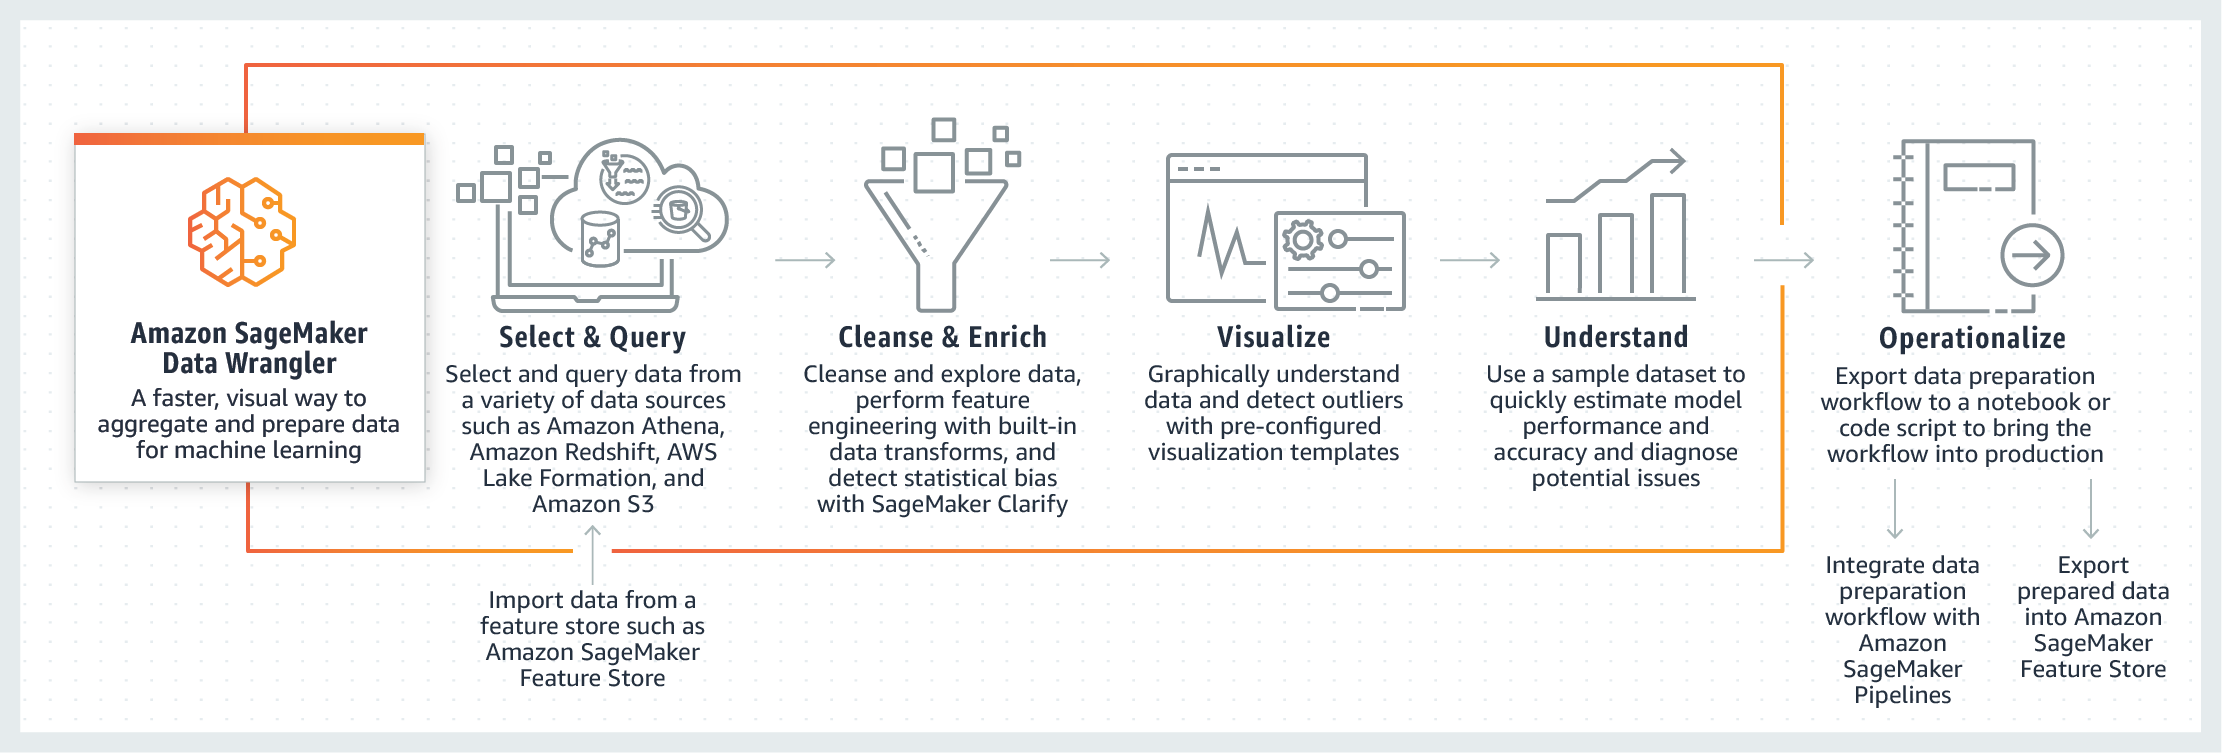

  - *SageMaker Processing*: Permite ejecutar fácilmente las cargas de trabajo de preprocesamiento, posprocesamiento y evaluación de modelos en una infraestructura completamente administrada.

- **Preparación de la Data:** 

  Preparamos un conjunto de datos para ML con SageMaker Data Wrangler, creamos y depositamos los conjuntos de datos en SageMaker Feature Store.

  Los procesos asociados a la Preparación de la Data son recolectar, features,  transformación, procesar y almacenar datos.

  Los datos se exportan de SageMaker Data Wrangler a un bucket S3. Luego se pre procesan utilizando SageMaker Processing.

  **Herramientas a utilizar:**

  - *SageMaker Feature Store*: Es un repositorio centralizado para features y sus correspondientes metadatos para que puedan ser compartidos y reutilizadas. Los datos se almacenan en S3 utilizando un esquema de prefijos basado en la fecha y hora del evento. Los datos se almacenan en formato Parquet para optimizar el almacenamiento y el acceso de lectura y se pueden combinar para producir conjuntos de entrenamiento, validación y prueba, y también extraer datos de distintos momentos del tiempo.

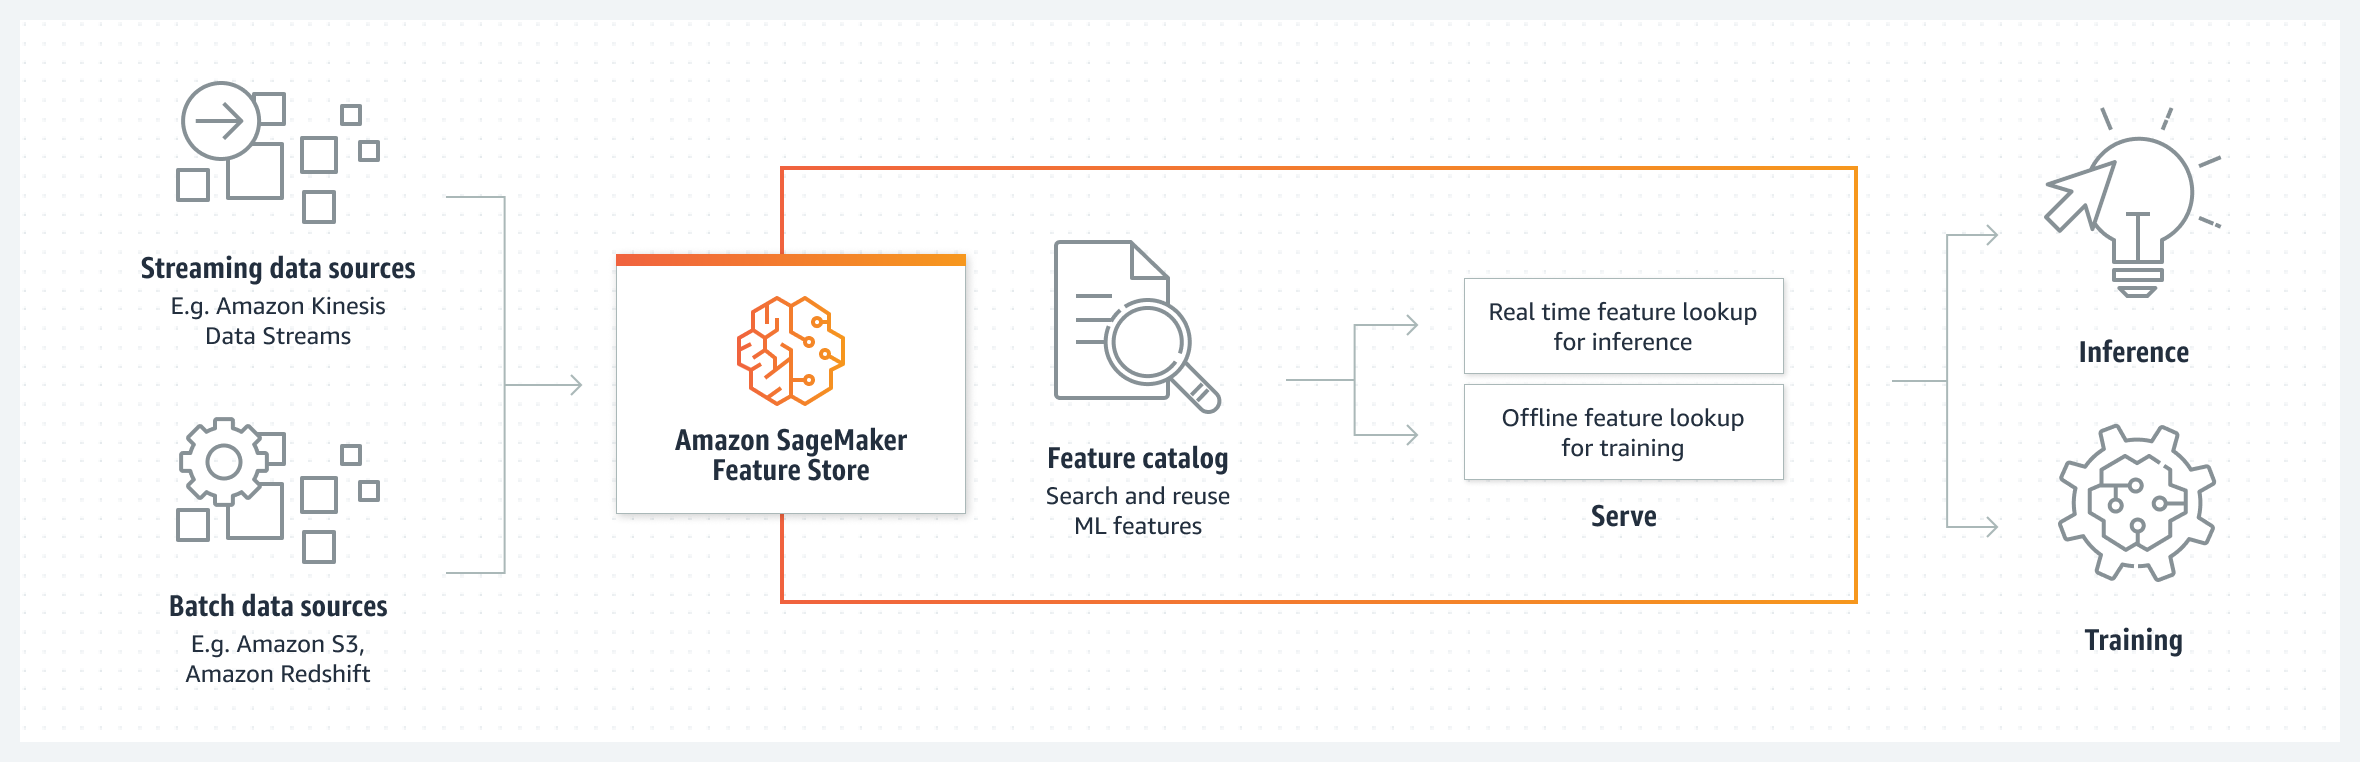

- **Entrenamiento y optimización:** 

  Se tienen los datos de train y test en nuestro bucket de S3 designado para tal fin y crearemos un estimador de XGBoost para entrenar nuestro modelo de clasificación (se puede optar por otro estimador de clasificación). También evaluamos el grado de sesgo en el pre-entrenamiento y post-entrenamiento utilizando *SageMaker Clarify*. Por último se debe registrar el modelo para implementarlo más adelante con SageMaker Model Register.

  **Herramientas a utilizar:**

  - SageMaker Clarify: Esta herramientaproporciona a los desarrolladores de Machine Learning una mayor visibilidad de los datos y modelos de formación para que puedan identificar y limitar los sesgos y explicar las predicciones. 

  Además detecta posibles sesgos durante la preparación de los datos, después de la formación de modelos y en el modelo implementado mediante el examen de los atributos que especifique.

  - SageMaker Model Register: Es un catálogo de modelos para producción, además de administrar versiones de modelos, asocia metadatos, como métricas de entrenamiento, con un modelo. Tambien administra el estado de aprobación de un modelo, implementa modelos en producción y automatiza la implementación de modelos con CI/CD.


- **Desplegar el Modelo:**

  Luego de mitigar el sesgo, volver a entrenar un modelo menos sesgado, se vuelve a almacenar en SageMaker Model Register. Luego, implementamos el modelo en Amazon SageMaker Hosted EndPoint y ejecutamos la inferencia en tiempo real a través de SageMaker Feature Store.

- **Pipeline Notebook:**

  Después de varias exploraciones manuales, con buenos resultados de nuestras limpiezas, transformaciones y featurizaciones podemos crear un workflow automatizado con SageMaker Pipelines para poder escalar y no volver a pasar por este proceso manual cada vez que sea el momento de re-entrenar.

  Nuestro end-to-end del pipeline de MLOps consta de los siguientes pasos:

  - Preprocesar datos con SageMaker Data Wrangler.
  - Crear un dataset y el train/test split.
  - Entrenar el algoritmo XGBoost.
  - Crear el modelo.
  - Evaluar las métricas de sesgo con SageMaker Clarify.
  - Registrar el modelo.
  - Desplegar el modelo.

# **DIAGRAMA GLOBAL DE LA SOLUCIÓN**

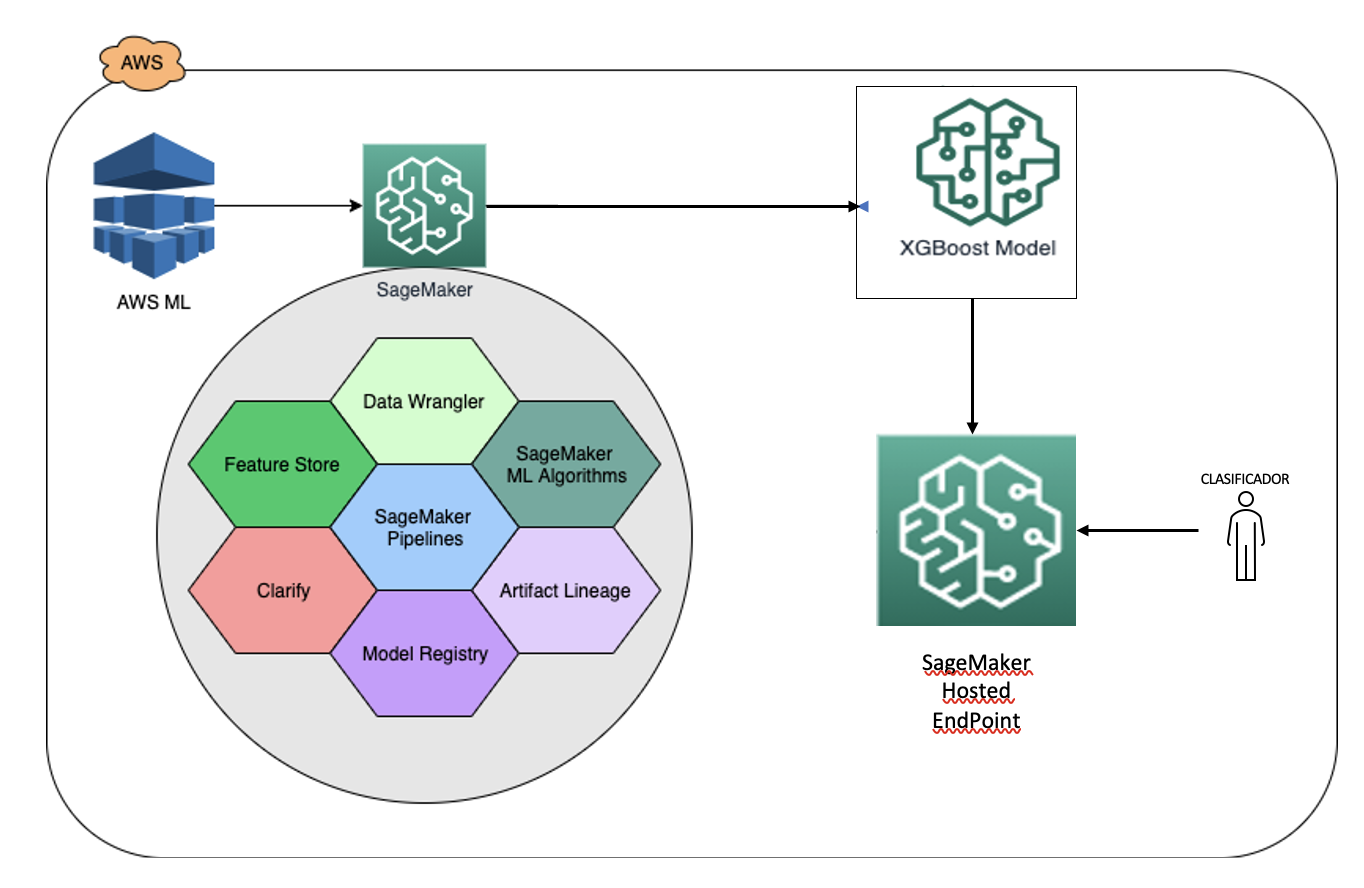

##**Identificando procesos de la Integración Continua (CI), de la Entrega Continua (CD) y del Entrenamiento Continuo (CT) correspondientes de AWS.**#

La Integración Continua (CI): Es el proceso encargado de probar y validar el código y sus componentes, y de, probar y validar datos, esquemas de datos y modelos.

En nuestro proyecto esto es ta representando por las etapas:
  - Exploración de Data.
  - Preprocesamiento de Data.

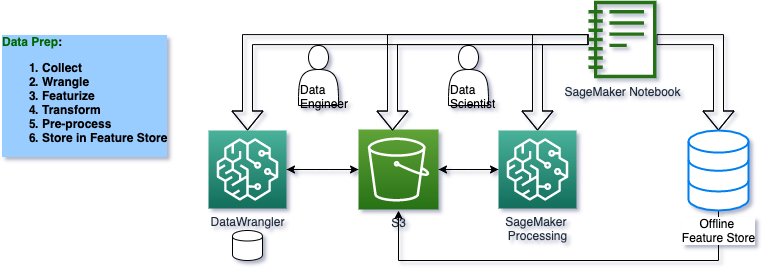

La Entrega Continua (CD): Es el sistema que permite la entrega automática al repositorio previo a la producción.

En nuestro proyecto esto es ta representando por las etapas:
  - Entrenamiento y optimización

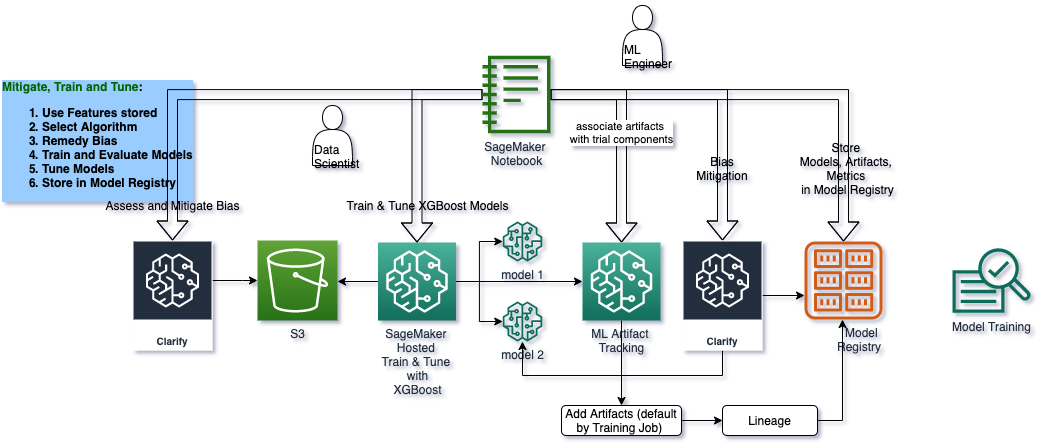

El Entrenamiento Continuo (CT): Es el proceso definido para los sistemas de ML que se ocupa de volver a entrenar y entregar los modelos de forma automática.

En nuestro proyecto esto es ta representando por las etapas:

  - Despliegue del modelo

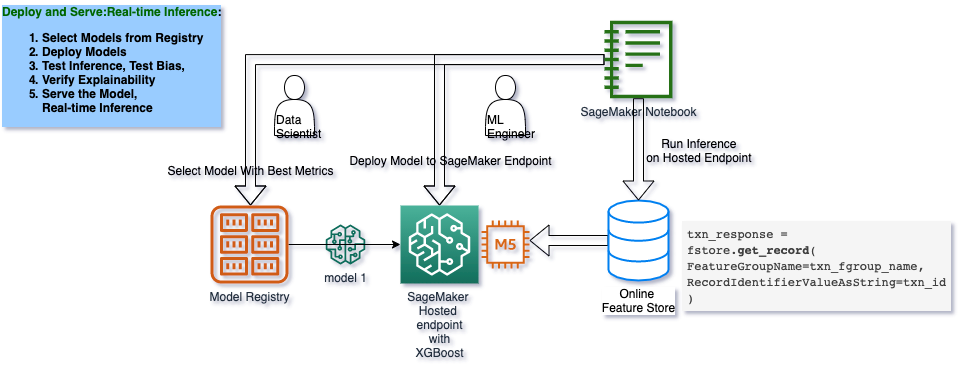

El Despliegue continuo (CD): Es el proceso definido para el despliegue automático en producción.

En nuestro proyecto esto es ta representando por las etapas:

  - Pipeline Notebooks.

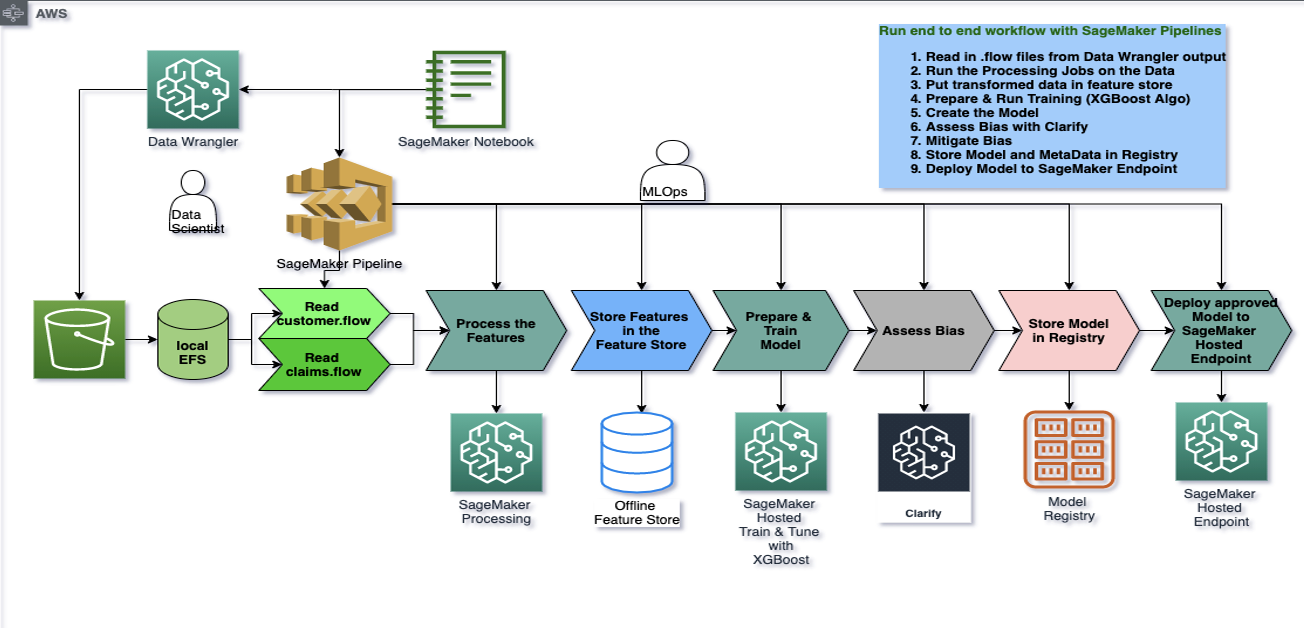

